# Regresja liniowa

### Przygotowanie środowiska programistycznego

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as py

# Zapoznanie się z regresją liniową
* W ramach tego ćwiczenia będziemy chcieli opisać zbiór danych modelem liniowym.
* Zbiór danych stworzymy sami w sposób sztuczny, ale w typowych problemach zebranie i obróbka danych stanowi znaczącą część pracy.
* Nasz liniowy model ma postać: $y = \theta_0 + \theta_1 x$
* Dane wytworzymy dla konkretnych $\theta_0$ i $\theta_1$, a następnie zaimplementujemy regresję liniową, aby znaleźć jak najlepsze przybliżenie dla tych parametrów.
* `(X,Y)` to ciąg uczący. *Co to ciąg uczący?*

## Produkcja danych

Dane wytorzymy według liniowej zależnoći 

$$
y = \theta_0 + \theta_1 \cdot x
$$

Ustalamy parametry dla symulacji na $\theta_0 = 1$ i $\theta_1 = 3$. Dla wygody włóżmy oba parametry do wektora (np.array):

$$
\vec{\theta} = (\theta_{0}, \theta_{1})
$$

In [2]:
theta0 = 1
theta1 = 3
theta = np.array([theta0, theta1])

Użyjemy **nPoints** równoodległych punktów $x$ i dla nich wygenerujmy pukty wg. założonego modelu. 

Dla wygody dane załadujemy do obiektu DataFrame. By to zrobić musimy zmienić wektor wierszowy na kolumnowy o kształcie $(-1,1)$. 

Użyjemy do tego użyciu funkcji ```reshape()``` (ta zamiana także przyda się w dalszej części ćwiczeń).

In [3]:
nPoints = 100
x = np.linspace(0, 10, nPoints)
x = np.reshape(x, (-1,1))

df = pd.DataFrame(data=x, columns = ["x"])
df["y"] = theta[0] + df["x"]*theta[1]

**Proszę:**

* do danych "czystych" dodać kolumnę z danymi z szumem Gaussowskim: $$ y_{noise} = y + Rand(N(0,1)) $$

In [4]:
...
print(df)

           x          y    y_noise
0    0.00000   1.000000   1.568704
1    0.10101   1.303030   1.265411
2    0.20202   1.606061  -0.876349
3    0.30303   1.909091   2.509570
4    0.40404   2.212121   2.652814
..       ...        ...        ...
95   9.59596  29.787879  29.642332
96   9.69697  30.090909  27.149277
97   9.79798  30.393939  30.455861
98   9.89899  30.696970  28.830628
99  10.00000  31.000000  32.446875

[100 rows x 3 columns]


Obejrzyjmy te dane. 

**Proszę narysować:**
* na jednym rysunku: y vs x oraz y_noise vs x
* na drugim rysunku: histogram y - y_noise   

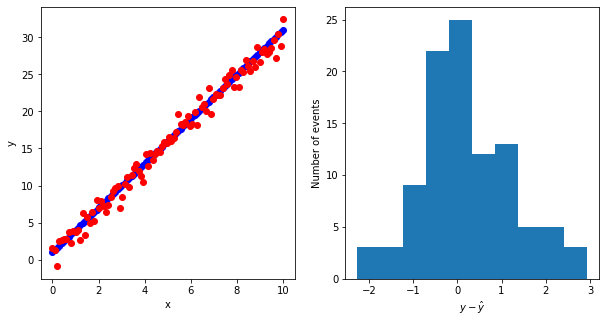

In [5]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

...

axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[1].set_xlabel(r'$y - \hat{y}$')
axes[1].set_ylabel("Number of events");

## Algorytm równań normalnych
**Proszę** napisać funkcję ```normal_equations(x,y)``` która:
* na wejściu przyjmuje ciąg uczący $x,y$, implementuje wzór na parametry optymalne na podstawie [równań normalnych](http://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_1#Minimalizacja_funkcji_kosztu ). 
* funkcja powinna zwracać estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ w postaci krotki
* funkcja powinna być przetestowana na czystych danych, czli parze $(x,y)$, a potem na danych zaszumionych $(x ,y_{noise}$)
* dla przypomnienia: odwrotność macierzy można obliczyć w numpy funkcją: <tt>numpy.linalg.inv</tt>
* proszę zwrócić uwagę, że konieczne jest użycie wektorów kolumnowych!

**Wskazówka:** aby skorzystać ze wzorów z wykładu, macierz wejść $X$ musi zawierać nie tylko kolumnę $x$, ale także kolumnę jedynek, aby przemnożona przez wektor [$\theta_0$ $\theta_1$] dawała odpowiedni wektor (kolumnowy) wyjść $y$.

In [6]:
def normal_equations(x,y):
    
    x_expanded = np.column_stack((np.ones(x.shape[0]), x))
...
    return theta

theta_est = normal_equations(df["x"], df["y"])

print("prawdziwe wartości parametrów:", theta.T)
print("wartości estymowane za pomocą równań normalnych dla nominalnych danych:", theta_est.T)

prawdziwe wartości parametrów: [1 3]
wartości estymowane za pomocą równań normalnych dla nominalnych danych: [1. 3.]


**Proszę:**

Korzystając z oszacowanych parametrów prostej narysować:
* punkty dla danych zaszumionych
* linię prostą dopasowaną do danych szasumionych
* linię prostą dla nominalnych parametrów
* linię prostą dopasowaną do losowego ułamka próbki, wybranego z użyciem funkcji pandas.DataFrame.sample()

Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: [0.85930132 2.98160889]
Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: [1.18228285 2.86471138] 
dla podpróbki obejmującej 5% przypadków.


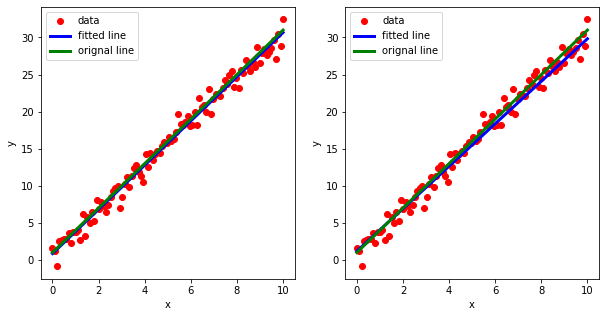

In [7]:
...
print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych:", theta_est.T)

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )
y_fit = np.sum(theta_est*x, axis=1)
y_original = np.sum(theta*x, axis=1)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(10,5))

# rysunki dla oryginalnych danych
...
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()

df_subsample = df.sample(frac=0.05)
theta_est = normal_equations(df_subsample["x"], df_subsample["y_noise"])
print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: {} \ndla podpróbki obejmującej 5% przypadków.".format(theta_est.T))

y_fit = np.sum(theta_est*x, axis=1)
y_original = np.sum(theta*x, axis=1)

# rysunki dla zaszumionych danych
...
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].legend();

## Algorytm gradientowy stochastyczny 

**Proszę** napisać funkcję ```iterative_stochastic_gradient(x,y, theta, alpha, nIter)``` która:
* na wejściu przyjmuje ciąg uczący w postaci wektorów x i y, wartości początkowe $(\theta_{0}, \theta_{1})$, parametr szybkości zbiegania $\alpha$ oraz liczbę iteracji nIter
* implementuje wzór na parametry optymalne na podstawie [algorytmu najmniejszych kwadratów](https://kampus-student2.ckc.uw.edu.pl/mod/url/view.php?id=247878). 
* funkcja powinna zwracać estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ dla wszystkich iteracji, czyli zwracać tablicę o kształcie
 $(nIter+1, 2)$. Początkową wartość $(\theta_{0}^{est}, \theta_{1}^{est})$ także należy dołączyc, stąd nIter+1 elementów
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ równą nominalnej, oraz różnej od nominalnej

In [8]:
%%time

def iterative_stochastic_gradient(x, y, init_theta, alpha, nIter):
    
    theta = init_theta
    theta_est = np.copy(theta)
    theta_est = np.reshape(theta_est, (-1,2))
    
    indices = np.random.randint(low=0, high=len(x)-1, size=(nIter))
    for iteration in range(nIter):
...
        theta_est = np.append(theta_est, theta, axis=0)
    return theta_est   
        
          
theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta, 0.01, 1)    
print("Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta:",theta_est[-1])

theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta+1, 0.01, 10)    
print("Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta:",theta_est[-1])

Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta: [1. 3.]
Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta: [1.77238344 2.86771223]
CPU times: user 2.8 ms, sys: 0 ns, total: 2.8 ms
Wall time: 1.9 ms


**Proszę** narysować następujące rysunki:
* dane, oraz krzywe regresji dla 10 iteracji na jednym rysunku
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.1, 0.05 oraz 0.01 oraz 10 iteracji
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 dla 100 iteracji

W każdym przypadku jako wartości początkowe proszę przyjąć ($\theta_{0}$, $\theta_{1}$) + 1

Finalna wartość parametrów dla alpha=0.1, nIter = 10: 		 [ -23510.45220961 -114602.63809552]
Finalna wartość parametrów dla alpha=0.05, nIter = 10: 		 [-119.38282225   75.45579649]
Finalna wartość parametrów dla alpha=0.001, nIter = 10: 	 [1.72457552 2.86060373]
Finalna wartość parametrów dla alpha=0.001, nIter = 100: 	 [1.42275831 2.87410939]
Oryginalna wartość parametrów: 				 [1 3]


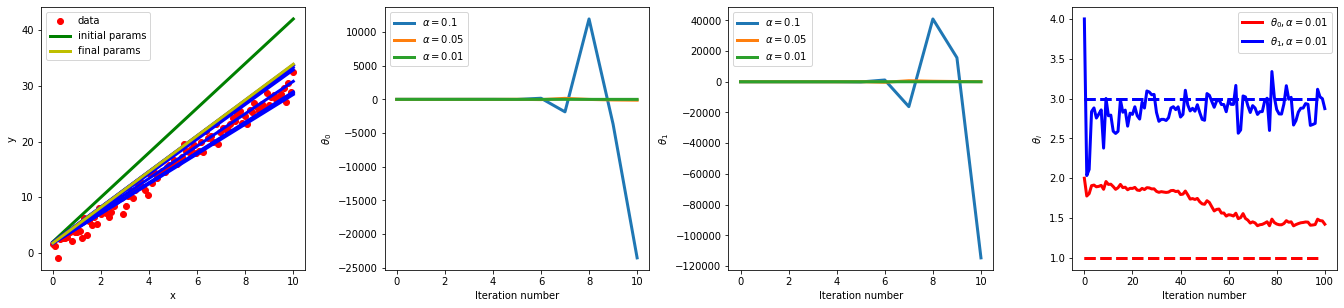

In [9]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

theta_est = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, 0.01, 10)  

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )

axes[0].plot(df["x"], df["y_noise"], 'ro', label = "data");

y_fit = theta_est.dot(x.T)
y_fit = y_fit.T

# rysunki dla y vs x dla danych i dopasowanych w każdej iteracji
...

axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend();

theta_alpha_01 = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.1, nIter = 10) 
theta_alpha_005 = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.05, nIter = 10) 
theta_alpha_001 = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.01, nIter = 10)
theta_alpha = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.01, nIter = 100)

# rysunki dla theta_0
...
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{0}$')
axes[1].legend();

# rysunki dla theta_1
...
axes[2].set_xlabel("Iteration number")
axes[2].set_ylabel(r'$\theta_{1}$')
axes[2].legend();

# rysunki dla theta_0 i theta_1 w funkcji numeru iteracji
...
axes[3].plot(np.full_like(x,theta[0]),  "--r",linewidth=3.0);
axes[3].plot(np.full_like(x,theta[1]),  "--b",linewidth=3.0);
axes[3].set_xlabel("Iteration number")
axes[3].set_ylabel(r'$\theta_{i}$')
axes[3].legend();

print("Finalna wartość parametrów dla alpha=0.1, nIter = 10: \t\t",theta_alpha_01[-1])
print("Finalna wartość parametrów dla alpha=0.05, nIter = 10: \t\t",theta_alpha_005[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 10: \t",theta_alpha_001[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 100: \t",theta_alpha[-1])
print("Oryginalna wartość parametrów: \t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Algorytm gradientowy zbiorczy

**Proszę** napisać funkcję ```iterative_batch_gradient(x,y, theta, alpha, nIter)``` która:
* na wejściu przyjmuje ciąg uczący w postaci wektorów ```x``` i ```y```, wartości początkowe $(\theta_{0}, \theta_{1})$, 
  parametr szybkości zbiegania $\alpha$ oraz liczbę iteracji ```nIter```
* implementuje wzór na parametry optymalne na podstawie [algorytmu najmniejszych kwadratów](https://kampus-student2.ckc.uw.edu.pl/mod/url/view.php?id=247878). 
* funkcja powinna zwracać estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ dla wszystkich iteracji, czyli zwracać tablicę o kształcie
 $(nIter+1, 2)$. Początkową wartość $(\theta_{0}^{est}, \theta_{1}^{est})$ także należy dołączyc, stąd nIter+1 elementów
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ równą nominalnej, oraz różną od nominalnej wartością
  parametrów $(\theta_{0}, \theta_{1})$

In [10]:
%%time

def iterative_batch_gradient(x, y, init_theta, alpha, nIter):
    
    theta = init_theta
    theta_est = np.copy(theta)
    theta_est = np.reshape(theta_est, (-1,2))
    batchSize = len(x)
    for iteration in range(nIter):  
...
        theta_est = np.append(theta_est, theta, axis=0)
    return theta_est   
        
theta_est = iterative_batch_gradient(df["x"], df["y"], init_theta=theta, alpha=0.01, nIter=1)    
print("Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta:",theta_est[-1])

theta_est = iterative_batch_gradient(df["x"], df["y"], init_theta=theta+1, alpha=0.01, nIter=500)    
print("Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta:",theta_est[-1])

Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta: [1. 3.]
Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta: [1.06901228 2.9896233 ]
CPU times: user 101 ms, sys: 9.13 ms, total: 110 ms
Wall time: 103 ms


**Proszę** narysować następujące rysunki:
* dane oraz krzywe regressji dla 10 iteracji na jednym rysunku
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.1, 0.05 oraz 0.01 oraz 10 iteracji
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 dla 100 iteracji

W każdym przypadku jako wartości początkowe proszę przyjąć ($\theta_{0}$, $\theta_{1}$) + 1

Finalna wartość parametrów dla alpha=0.1, nIter = 10: 		 [ 8222664.62695693 54686443.32586087]
Finalna wartość parametrów dla alpha=0.05, nIter = 10: 		 [1233.80112035 8197.79552404]
Finalna wartość parametrów dla alpha=0.001, nIter = 10: 	 [1.77816026 2.84346051]
Finalna wartość parametrów dla alpha=0.001, nIter = 100: 	 [1.44643933 2.89332671]
Oryginalna wartość parametrów: 				 [1 3]


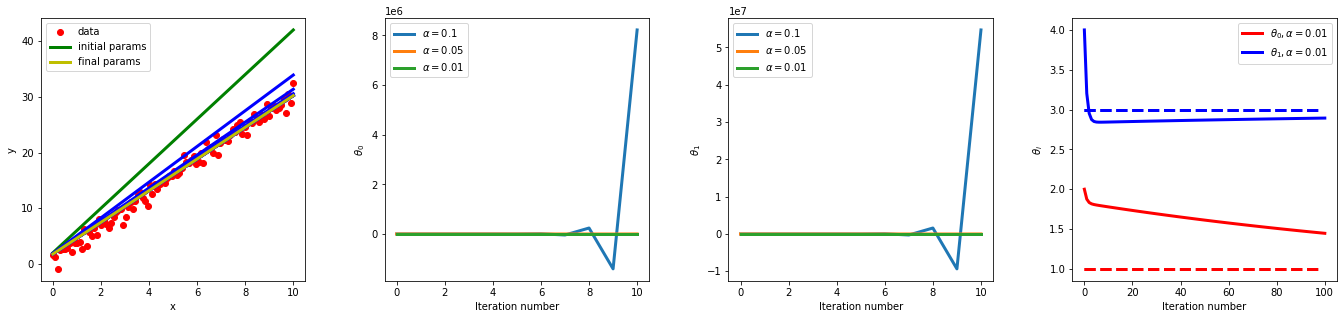

In [11]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

theta_est = iterative_batch_gradient(df["x"], df["y_noise"], theta+1, 0.01, 10)  

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )

axes[0].plot(df["x"], df["y_noise"], 'ro', label = "data");

y_fit = theta_est.dot(x.T)
y_fit = y_fit.T

...
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend();

...

...
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{0}$')
axes[1].legend();

...
axes[2].set_xlabel("Iteration number")
axes[2].set_ylabel(r'$\theta_{1}$')
axes[2].legend();

...
axes[3].plot(np.full_like(x,theta[0]),  "--r",linewidth=3.0);
axes[3].plot(np.full_like(x,theta[1]),  "--b",linewidth=3.0);
axes[3].set_xlabel("Iteration number")
axes[3].set_ylabel(r'$\theta_{i}$')
axes[3].legend();

print("Finalna wartość parametrów dla alpha=0.1, nIter = 10: \t\t",theta_alpha_01[-1])
print("Finalna wartość parametrów dla alpha=0.05, nIter = 10: \t\t",theta_alpha_005[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 10: \t",theta_alpha_001[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 100: \t",theta_alpha[-1])
print("Oryginalna wartość parametrów: \t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Porównanie algorytmów
**Proszę** sprawdzić czy algorytmy optymalizacyjne działają poprawnie dla danych gdzie szum podlega innym rozkładom prawdopodobieństwa niż normalny:

* dla rozkładu jednorodnego w zakresie [-1,1[
* dla rozkłatu t-Studenta o trzech stopniach swobody

Dla wszystkch trzech rozkładów proszę narysować wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 i 100 iteracji.

In [12]:
...
df["y_tStudent_noise"] = df["y"] + np.random.standard_t(df=3, size=nPoints)
print(df)

           x          y    y_noise  y_flat_noise  y_tStudent_noise
0    0.00000   1.000000   1.568704      1.515168          3.272327
1    0.10101   1.303030   1.265411      1.703459          2.234227
2    0.20202   1.606061  -0.876349      1.824014          0.198175
3    0.30303   1.909091   2.509570      2.908943          1.601233
4    0.40404   2.212121   2.652814      2.583388          0.656814
..       ...        ...        ...           ...               ...
95   9.59596  29.787879  29.642332     29.510447         28.835933
96   9.69697  30.090909  27.149277     29.969674         30.316076
97   9.79798  30.393939  30.455861     30.607494         30.830391
98   9.89899  30.696970  28.830628     31.447399         29.903130
99  10.00000  31.000000  32.446875     31.871351         31.044565

[100 rows x 5 columns]


**Proszę:**
* narysować histogramy różnicy zaszumionej i oryginalnej wartości y dla trzech typów szumu: Gaussa, płaskiego, t-Studenta

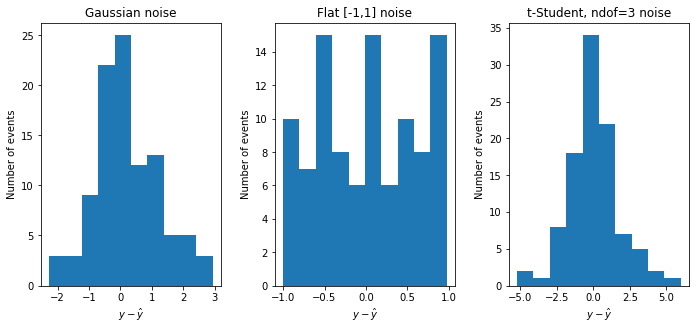

In [13]:
fig, axes = plt.subplots(1,3, figsize=(10,5))

...

axes[0].set_title("Gaussian noise")
axes[0].set_xlabel(r'$y - \hat{y}$')
axes[0].set_ylabel("Number of events");

axes[1].set_title("Flat [-1,1] noise")
axes[1].set_xlabel(r'$y - \hat{y}$')
axes[1].set_ylabel("Number of events");

axes[2].set_title("t-Student, ndof=3 noise")
axes[2].set_xlabel(r'$y - \hat{y}$')
axes[2].set_ylabel("Number of events");

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

**Proszę:**
* narysować wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 i 200 iteracji dla każdego z rodzajów szumu

Finalna wartość parametrów dla szumu gaussowskiego, nIter = 100: 	 [1.21626198 2.92793622]
Finalna wartość parametrów dla szumu płaskiego, nIter = 100: 		 [1.24283683 2.96644627]
Finalna wartość parametrów dla szumu tStudenta, nIter = 100: 		 [1.37875945 2.93367163]
Oryginalna wartośc parametrów: 					 [1 3]
CPU times: user 139 ms, sys: 6.25 ms, total: 146 ms
Wall time: 138 ms


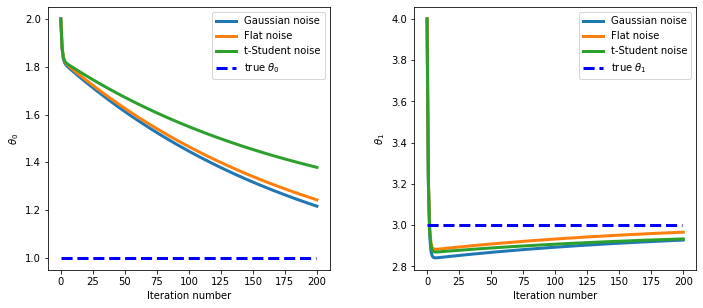

In [14]:
%%time
fig, axes = plt.subplots(1,2, figsize=(10,5))

nIter = 200
...

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )

...
axes[0].plot(np.full(nIter,theta[0]),  "--b",linewidth=3.0, label=r"true $\theta_{0}$");
axes[0].set_xlabel("Iteration number")
axes[0].set_ylabel(r'$\theta_{0}$')
axes[0].legend();

...
axes[1].plot(np.full(nIter,theta[1]), "--b",  linewidth=3.0, label=r"true $\theta_{1}$");
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{1}$')
axes[1].legend();

print("Finalna wartość parametrów dla szumu gaussowskiego, nIter = 100: \t",theta_gaussian_noise[-1])
print("Finalna wartość parametrów dla szumu płaskiego, nIter = 100: \t\t",theta_flat_noise[-1])
print("Finalna wartość parametrów dla szumu tStudenta, nIter = 100: \t\t",theta_tStudent_noise[-1])
print("Oryginalna wartośc parametrów: \t\t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)